<a href="https://colab.research.google.com/github/ahmedmek1/Machine-learning-projects-sklearn/blob/main/titanic_survivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction 👋
<img src="https://nypost.com/wp-content/uploads/sites/2/2017/01/170103-titanic-ship-feature.jpg?quality=90&strip=all&w=1488" alt="Titanic Ship Picture" width="800" height="800"><br>

## Data Set Problems 🤔
👉 This dataset contains information about general information (gender, age) and detail of each passengers (ticket class, fare, cabin number, and etc). Machine learning model is needed in order **to predict survivor of titanic passenger.**

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Dataset exploration using various types of data visualization.
*   Build various ML models that can predict survivor of titanic passenger.
*   Generating prediction output in csv format.

👨‍💻 **The machine learning models used in this project are:** 
1. Logistic Regression
2. SVC
3. K Neighbors Classifier
4. Decision Tree
5. Random Forest
6. Gradient Boosting

---

## Data Set Description 🧾

👉 There are **12 variables** in this data set:
*   **4 categorical** variables,
*   **4 continuous** variables,
*   **1** variable that contains ID of passenger,
*   **1** variable to accommodate the name of passenger,
*   **1** variable that stores ticket number, and
*   **1** variable with various cabin number.

<br>

👉 The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>PassengerId</b></td>
<td>ID of passenger <br> (unique ID)</td>
<td>1; 2; ...</td>
</tr>
<tr>
<td><b>Survived</b></td>
<td>Survival status <br> (0 = No, 1 = Yes)</td>
<td>0; 1; ...</td>
</tr>
<tr>
<td><b>Pclass</b></td>
<td>Ticket class <br> (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)</td>
<td>1; 3; ...</td>
</tr>
<tr>
<td><b>Name</b></td>
<td>Passenger name <br> (unique)</td>
<td>Braund, Mr. Owen Harris; Heikkinen, Miss. Laina; ...</td>
</tr>
<tr>
<td><b>Sex</b></td>
<td>Passenger gender <br> (male or female)</td>
<td>male; female; ...</td>
</tr>
<tr>
<td><b>Age</b></td>
<td>Passenger age <br> (in years)</td>
<td>22; 38; ...</td>
</tr>
<tr>
<td><b>SibSp</b></td>
<td>No of siblings / spouses aboard the Titanic</td>
<td>0; 3; ...</td>
</tr>
<tr>
<td><b>Parch</b></td>
<td># of parents / children aboard the Titanic</td>
<td>1; 2; ...</td>
</tr>
<tr>
<td><b>Ticket</b></td>
<td>Ticket number<br> (unique)</td>
<td>A/5 21171; PC 17599; ...</td>
</tr>
<tr>
<td><b>Fare</b></td>
<td>Passenger fare</td>
<td>7.25; 71.2833; ...</td>
</tr>
<tr>
<td><b>Cabin</b></td>
<td>Cabin number</td>
<td>C85; C123; ...</td>
</tr>
<tr>
<td><b>Embarked</b></td>
<td>Embarkation port<br> (C = Cherbourg, Q = Queenstown, S = Southampton)</td>
<td>C; S; ...</td>
</tr>
</tbody>
</table>

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*

# 2. Importing Libraries 📚
👉 **Importing libraries** that will be used in this notebook.

In [ ]:
#Connect to google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/"

In [ ]:
!kaggle datasets download -d brendan45774/test-file

401 - Unauthorized


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train_ds = pd.read_csv("train.csv")
test_ds = pd.read_csv("test.csv")

In [ ]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(train_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


👉 In train data set, **it can be seen the data type for each column**. Also, **there are some null values** in specific columns.

In [ ]:
test_ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(test_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


👉 Same like train data set, in test data set **there are some null values in specific columns**.

# 4. Data Exploration 🔍
👉 This section will perform data exploration of data set that has been imported.

## 4.1 Survived Distribution 😇

In [ ]:
train_ds.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

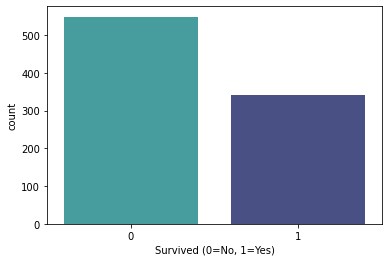

In [ ]:
sns.countplot(x="Survived", data=train_ds, palette="mako_r")
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

In [ ]:
countNotSurvive = len(train_ds[train_ds.Survived == 0])
countSurvive = len(train_ds[train_ds.Survived == 1])
print("Not Survive Percentage: {:.2f}%".format((countNotSurvive / (len(train_ds.Survived))*100)))
print("Survive Percentage: {:.2f}%".format((countSurvive / (len(train_ds.Survived))*100)))

Not Survive Percentage: 61.62%
Survive Percentage: 38.38%


👉 It can be seen that **most passengers are not survived** 😢.

## 4.2 Gender Distribution 👫

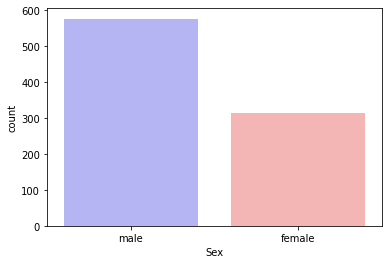

In [ ]:
sns.countplot(x='Sex', data=train_ds, palette="bwr")
plt.xlabel("Sex")
plt.show()

In [ ]:
countFemale = len(train_ds[train_ds.Sex == "female"])
countMale = len(train_ds[train_ds.Sex == "male"])
print("Female Percentage: {:.2f}%".format((countFemale / (len(train_ds.Sex))*100)))
print("Male Percentage: {:.2f}%".format((countMale / (len(train_ds.Sex))*100)))

Female Percentage: 35.24%
Male Percentage: 64.76%


👉 **The percentage of male passengers is higher** than female passengers.

## 4.3 Survived Distribution based on Gender 😇👫

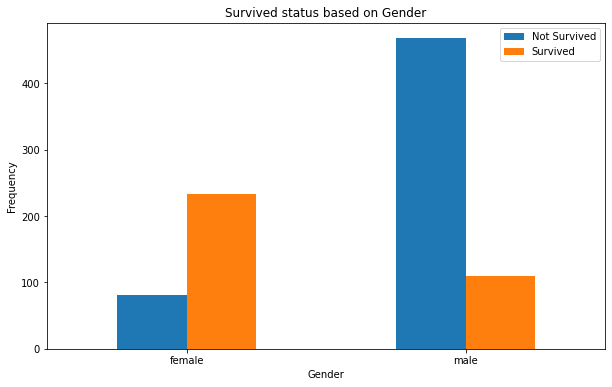

In [ ]:
pd.crosstab(train_ds.Sex,train_ds.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status based on Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Frequency')
plt.show()

👉 The number of **male passengers that are not survived is higher** than survied 😢. <br>
👉 The number of **female passengers that are survived is higher** than not survived.

## 4.4 Survived Distribution based on Age 😇👴

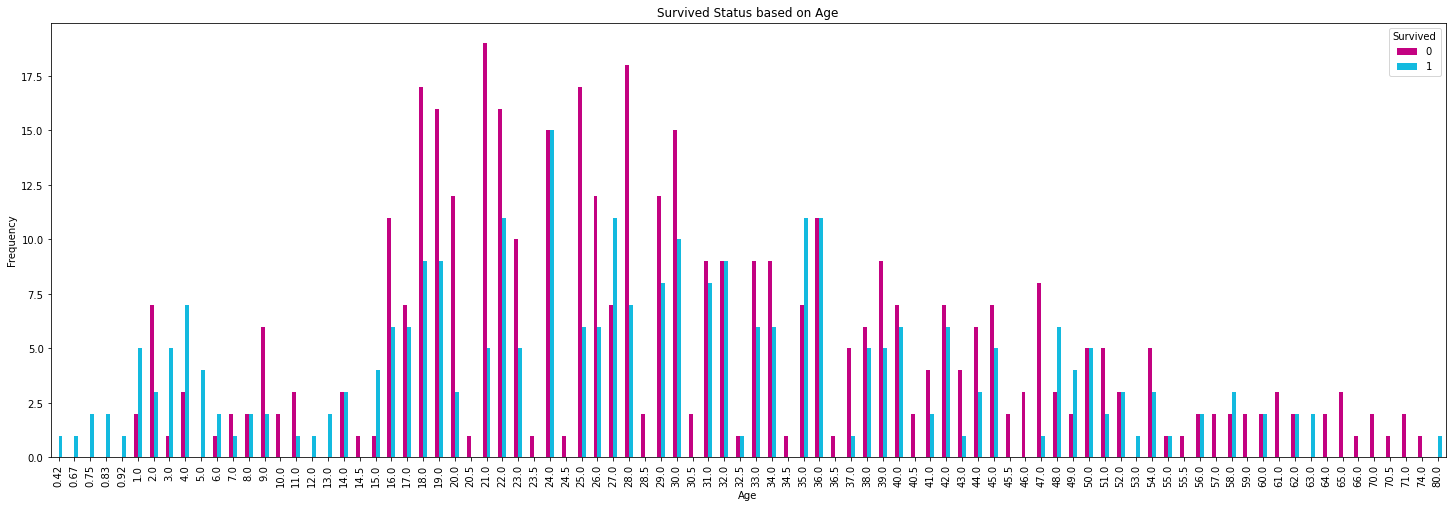

In [ ]:
pd.crosstab(train_ds.Age,train_ds.Survived).plot(kind="bar",figsize=(25,8), color=['#C30281','#13BADF'])
plt.title('Survived Status based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

👉 It can be seen that **the majority of not survived passengers are between 16-30 y.o**, quite similar to survived passengers in the same age range.

## 4.5 Passenger Class based on Age 🌟👴

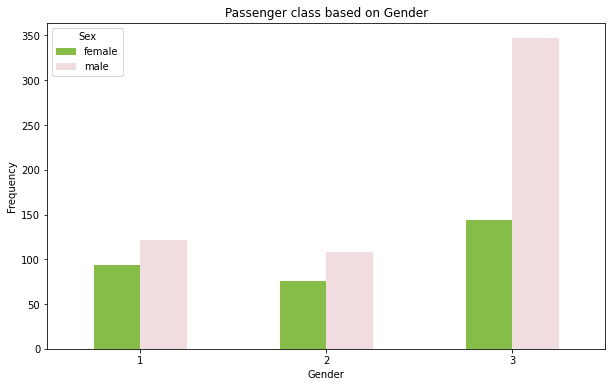

In [ ]:
pd.crosstab(train_ds.Pclass,train_ds.Sex).plot(kind="bar",figsize=(10,6), color=['#86BD49','#F1DDDF'])
plt.title('Passenger class based on Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 Most of passengers from **both genders prefer to choose 3rd class** rather than other classes.

# 5. Dataset Preprocessing 🧹
👉 This section will preprocess/clean both data sets.

## 5.1 Detecting Missing Values 🚫

In [ ]:
train_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

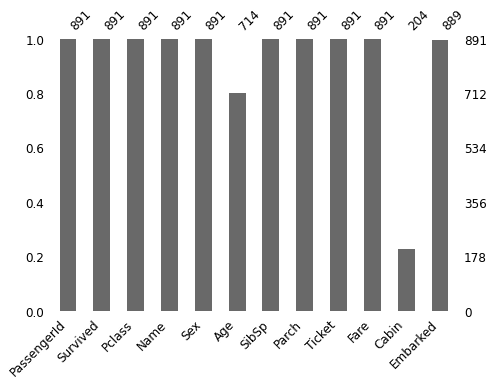

In [ ]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(train_ds, ax = ax_train, fontsize = 12)

👉 Missing Values detected in **"Age", "Cabin", and "Embarked"** column in **train dataset**.

In [ ]:
test_ds.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

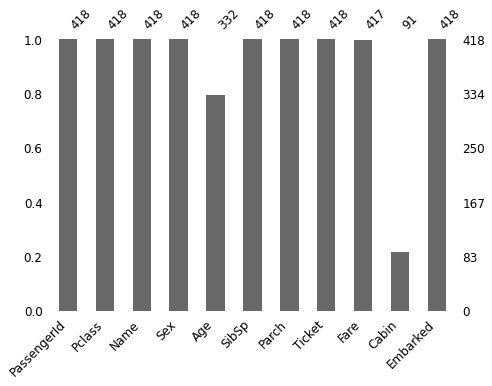

In [ ]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(test_ds, ax = ax_train, fontsize = 12)

👉 Missing Values detected in **"Age", "Cabin", and "Fare"** column in **test dataset**.

## 5.2 Replacing Missing Values 📝
👉 Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

In [ ]:
# Age (with mean)
train_ds['Age'] = train_ds['Age'].fillna(train_ds['Age'].mean())
test_ds['Age'] = test_ds['Age'].fillna(test_ds['Age'].mean())

In [ ]:
# Fare (with mean)
test_ds['Fare'] = test_ds['Fare'].fillna(test_ds['Fare'].mean())

## 5.3 Distribution of Numerical Value 📈
👉 In this section will show the distribution of numerical variables and the skewness for each numerical variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f242d4e2e90>,
      dtype=object)

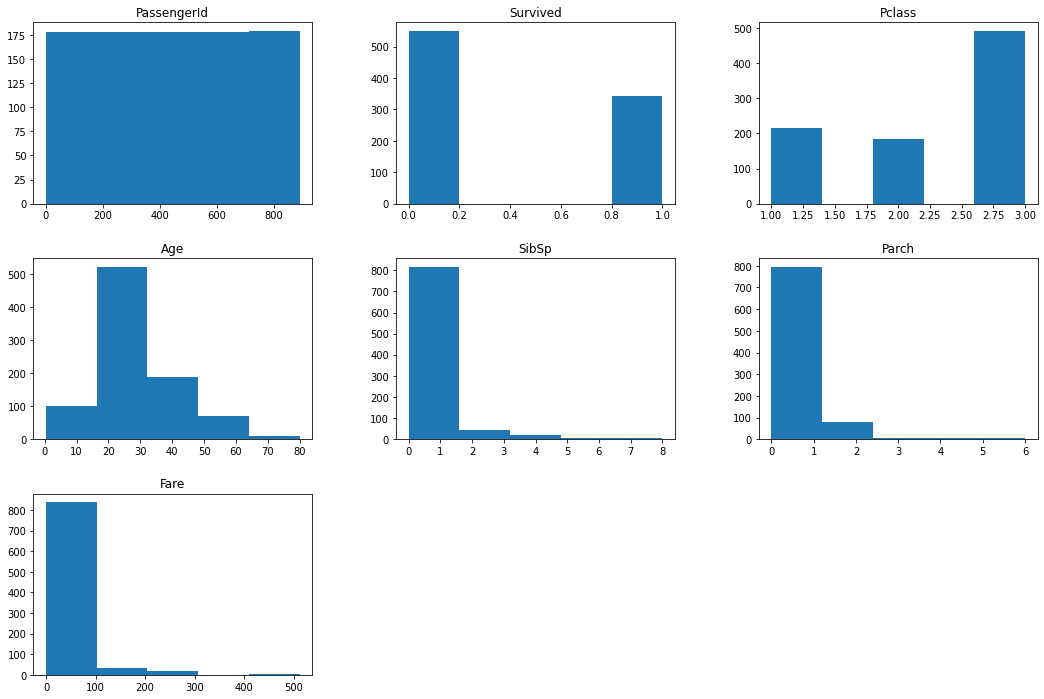

In [ ]:
train_ds.hist(grid=False, figsize=(18, 12), bins=5)

In [ ]:
train_ds.skew(axis = 0, skipna = True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f242d25a8d0>,
      dtype=object)

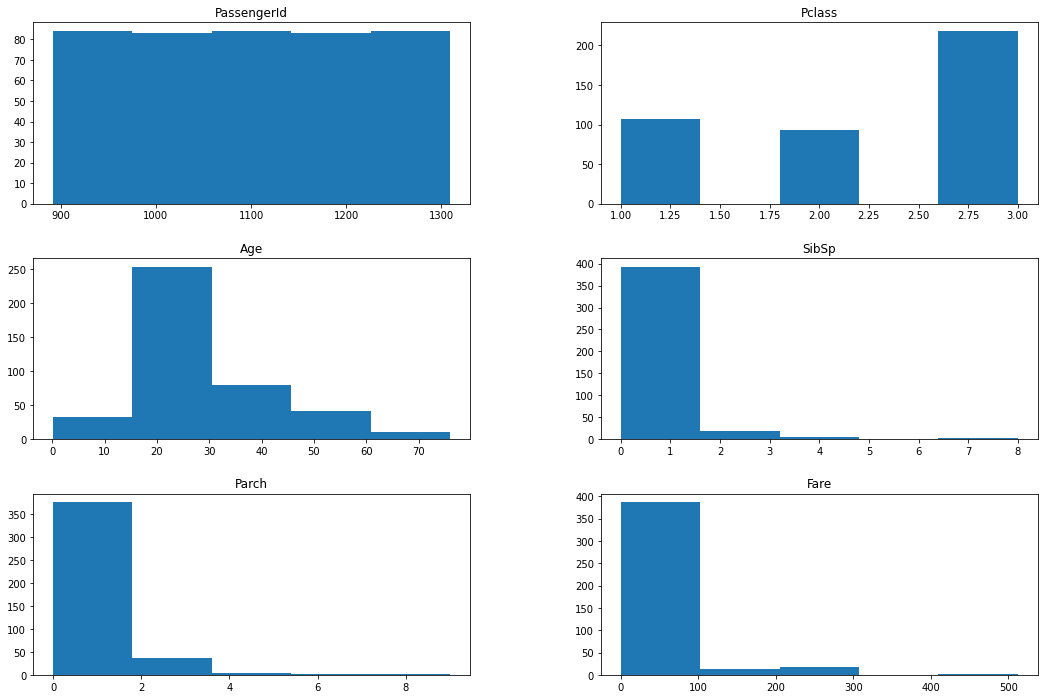

In [ ]:
test_ds.hist(grid=False, figsize=(18, 12), bins=5)

In [ ]:
test_ds.skew(axis = 0, skipna = True)

PassengerId    0.000000
Pclass        -0.534170
Age            0.512711
SibSp          4.168337
Parch          4.654462
Fare           3.691600
dtype: float64

👉 **Skewness of Fare, SibSp, and Parch** is **high**, **square root transformation will be performed** for test and training

## 5.4 Square root transformation 🔨

In [ ]:
train_ds.Fare = np.sqrt(train_ds.Fare)
test_ds.Fare = np.sqrt(test_ds.Fare)

train_ds.SibSp = np.sqrt(train_ds.SibSp)
test_ds.SibSp = np.sqrt(test_ds.SibSp)

train_ds.Parch = np.sqrt(train_ds.Parch)
test_ds.Parch = np.sqrt(test_ds.Parch)

## 5.5 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [ ]:
train_ds = pd.get_dummies(train_ds, columns=['Sex', 'Embarked', 'Pclass'])
test_ds = pd.get_dummies(test_ds, columns=['Sex', 'Embarked', 'Pclass'])

In [ ]:
train_ds.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,2.692582,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,8.442944,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,2.815138,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,7.286975,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,2.837252,NaN,0,1,0,0,1,0,0,1


In [ ]:
test_ds.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0.0,0.0,330911,2.798071,NaN,0,1,0,1,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1.0,0.0,363272,2.645751,NaN,1,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0.0,0.0,240276,3.112475,NaN,0,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0.0,0.0,315154,2.943213,NaN,0,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1.0,1.0,3101298,3.505353,NaN,1,0,0,0,1,0,0,1


## 5.6 Dropping Columns 🔻
👉 Since **Cabin, Name, Ticket, and PassengerId** contains unique data, these columns will be **removed**.

In [ ]:
train_ds = train_ds.drop(['Cabin','Name','Ticket'], axis = 1)
test_ds = test_ds.drop(['Cabin','Name','Ticket'], axis = 1)

In [ ]:
train_ds1 = train_ds.drop(['PassengerId'], axis = 1)
test_ds1 = test_ds.drop(['PassengerId'], axis = 1)

NameError: ignored

# 6. Dataset Preparation ⚙
👉 This section will prepare the dataset before building the machine learning models

## 6.1 Splitting the dataset into 80% training, 20% test 🪓

In [ ]:
predictors = train_ds1.drop(["Survived"], axis=1)
target = train_ds1["Survived"]

x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

## 6.2 SMOTE Technique ⚒¶
👉 Since the number of not survived passengers is more than survived passengers, **oversampling is carried out** to avoid overfitting.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

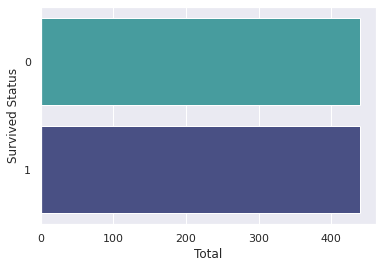

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=test_ds, palette="mako_r")
plt.ylabel('Survived Status')
plt.xlabel('Total')
plt.show()

# 7. Model Building 🛠

## 7.1 Logistic Regression

In [ ]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)

print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.72      0.77      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179

[[89 21]
 [16 53]]
Logistic regression accuracy: 79.33%


In [ ]:
y_pred = LRclassifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

## 7.2 Decision Tree

In [ ]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10)
DTclassifier.fit(x_train, y_train)

y_pred = DTclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
DTAcc = accuracy_score(y_pred,y_test)

print('Decision tree accuracy: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

[[99 11]
 [22 47]]
Decision tree accuracy: 81.56%


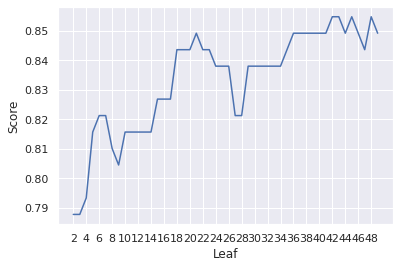

DT Acc Max: 85.47%


In [ ]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,2))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max: {:.2f}%".format(DTAccMax*100))

## 7.3 SVC

In [ ]:
SVCclassifier = SVC(kernel='linear')
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
SVCAcc = accuracy_score(y_pred,y_test)

print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

[[92 18]
 [20 49]]
SVC accuracy: 78.77%


## 7.4 K Neighbors Classifier

In [ ]:
KNclassifier = KNeighborsClassifier(n_neighbors=50)
KNclassifier.fit(x_train, y_train)

y_pred = KNclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
KNAcc = accuracy_score(y_pred,y_test)

print('K Neighbors Classifier accuracy: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       110
           1       0.65      0.61      0.63        69

    accuracy                           0.72       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.72      0.72      0.72       179

[[87 23]
 [27 42]]
K Neighbors Classifier accuracy: 72.07%


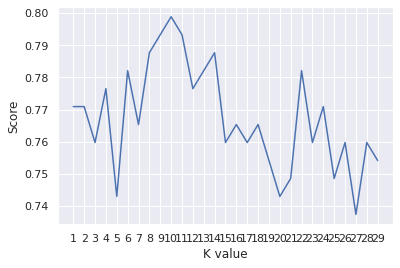

KNN Acc Max: 79.89%


In [ ]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max: {:.2f}%".format(KNAccMax*100))

## 7.5 Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=10)
RFclassifier.fit(x_train, y_train)

y_pred = RFclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

[[96 14]
 [20 49]]
Random Forest accuracy is: 81.01%


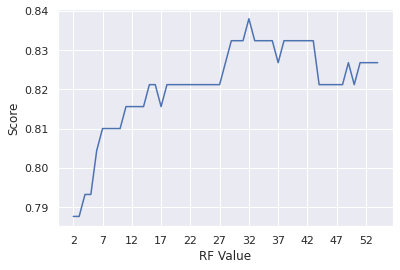

RF Acc Max: 83.80%


In [ ]:
scoreListRF = []
for i in range(2,55):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))
    
plt.plot(range(2,55), scoreListRF)
plt.xticks(np.arange(2,55,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max: {:.2f}%".format(RFAccMax*100))

## 7.6 Gradient Boosting

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=10)
GB.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_leaf_nodes=30, n_estimators=300)
0.8418364681295717
{'n_estimators': 300, 'max_leaf_nodes': 30, 'max_depth': 3}
5


In [ ]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=10)
GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy is: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       110
           1       0.85      0.77      0.81        69

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179

[[101   9]
 [ 16  53]]
Gradient Boosting accuracy is: 86.03%


# 8. Model Comparison 👀

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'SVC', 'K Neighbors Classifier', 'Random Forest Classifier'
                                 ,'Random Forest Max', 'K Neighbors Max', 'Decision Tree Max', 'Gradient Boosting'], 
                        'Accuracy': [LRAcc*100, DTAcc*100, SVCAcc*100 , KNAcc*100, RFAcc*100, RFAccMax*100, 
                                     KNAccMax*100, DTAccMax*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
8,Gradient Boosting,86.033520
7,Decision Tree Max,85.474860
5,Random Forest Max,83.798883
1,Decision Tree,81.564246
4,Random Forest Classifier,81.005587
6,K Neighbors Max,79.888268
0,Logistic Regression,79.329609
2,SVC,78.770950
3,K Neighbors Classifier,72.067039


👉 From the results, some models can achieve **up to 80% accuracy**.

# 9. Output 📤
👉 The next step will make output results in csv file

## 9.1 Making output file 📄

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=48)
RFclassifier.fit(x_train, y_train)
scoreListRF.append(RFclassifier.score(x_test, y_test))

prediction = RFclassifier.predict(test_ds1)

In [ ]:
output = pd.DataFrame({'PassengerId': test_ds['PassengerId'] , 'Survived': prediction})
output.to_csv('submission.csv', index=False)

## 9.2 Output File (CSV) 📄

In [ ]:
predcsv = pd.read_csv('./submission.csv')
predcsv.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
